# Building a Simple Neural Network

Welcome to the first lab of this course!

## The Delivery Problem

In this lab, you'll build and train your first neural network, a single neuron that learns patterns from data to make predictions. You'll work with a practical delivery scenario:

**You're a bike delivery person with a 7-mile delivery order.** Your company promises delivery in under 30 minutes, and you've been late three times last month. One more late delivery could put your job at risk. **Can you make this delivery on time?** 

Your neural network will learn from historical delivery data to help you make a data-driven decision. This is a perfect example of how machine learning differs from traditional programming: instead of writing rules (like "if distance > X, then time > Y"), you'll give the model examples of inputs (distances) and outputs (delivery times), and it will learn the relationship for you.

In [1]:
from IPython.display import Image

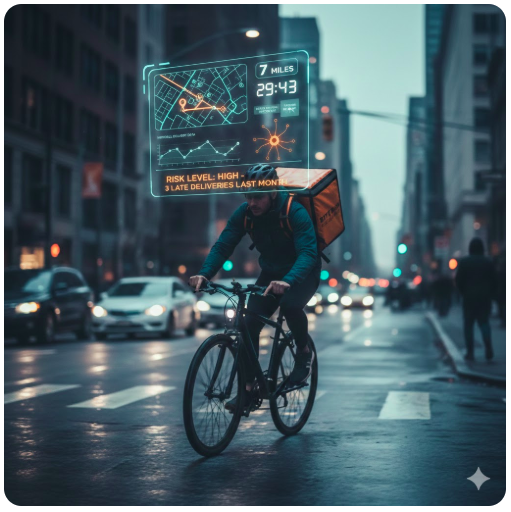

In [2]:
Image('../../assets//delivery-bike.png')


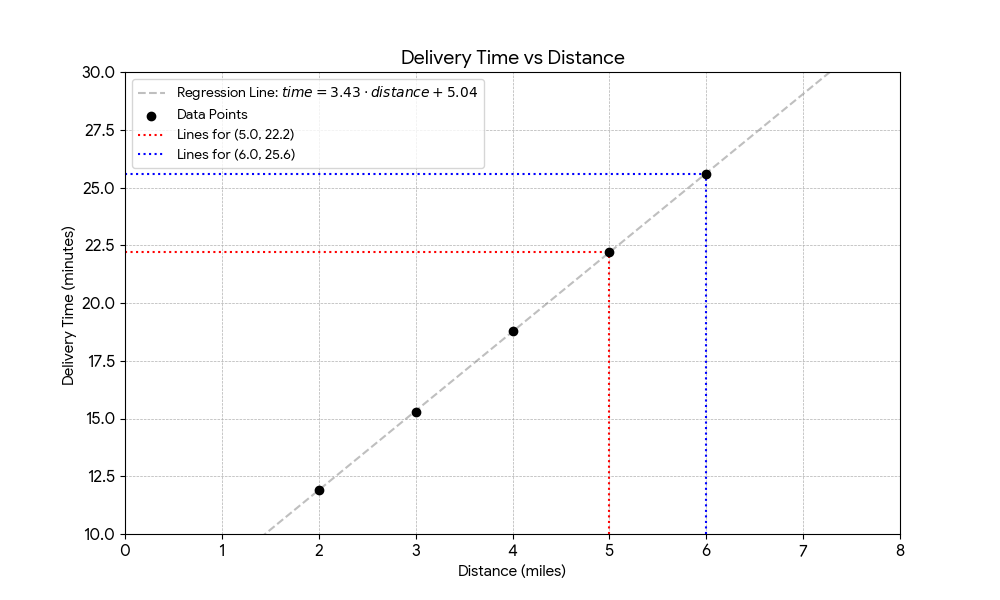

In [ ]:
Image('../../assets//delivery_time_vs_distance.png')

$$
\text{time} = 3.43 * \text{distance} + 5.04
$$

## Imports

Let's start with the imports. These will give you:
- **`torch`**: PyTorch's core functionality
- **`torch.nn`**: Components for building neural networks (abbreviated as `nn`)
- **`torch.optim`**: Tools for training these networks (abbreviated as `optim`)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(42)

In [ ]:
# Used for plotting and testing results without bloating the lab notebook
import helper_utils


## The Machine Learning Pipeline

Following the systematic **Machine Learning Pipeline**, you will:

- **Stage 1 & 2: Prepare** delivery data, the distances and times from past orders
- **Stage 3: Build** a simple neural network using PyTorch (just one neuron!)
- **Stage 4: Train** it to find the relationship between distance and delivery time
- **Stage 5: Evaluate** by making a prediction for that 7-mile delivery

Let's get started!

## The Machine Learning Pipeline in Action

It's time to build your first model! To solve the delivery problem, you will apply *relevant* stages of the **Machine Learning Pipeline**.

The Machine Learning Pipeline is a systematic framework used throughout PyTorch projects. It consists of six stages that guide you from raw data to a deployed model. While the full pipeline provides a comprehensive framework, its strength is its adaptability. For this problem, you will focus on the essential steps needed to build a predictive model from your data.

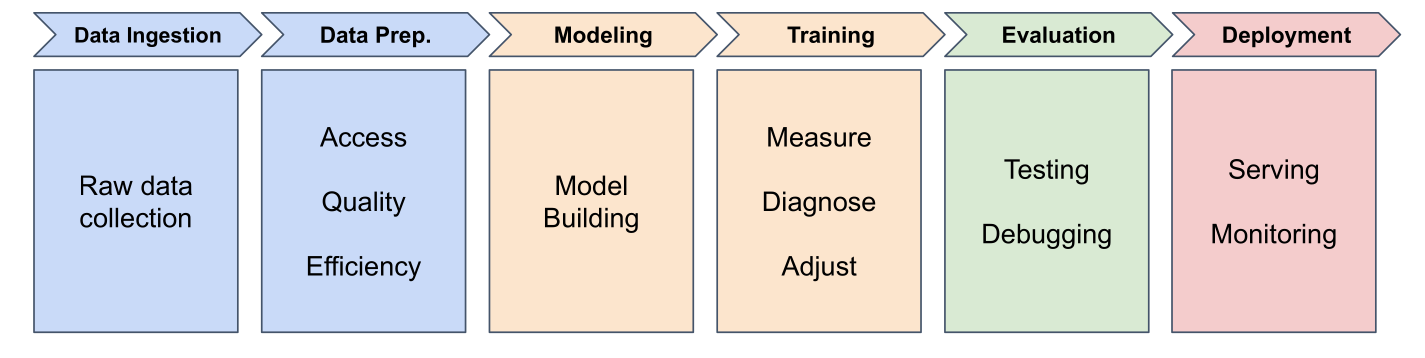

In [4]:
Image("../../assets/ml_pipeline.png")

### Stage 1 & 2: Data Ingestion and Preparation

**Stage 1: Data Ingestion** - It all starts with data. Before you can train any model, you need to gather your raw information and organize it so PyTorch can work with each data point efficiently. For the delivery predictor, that data would come from the company's delivery records.

**Stage 2: Data Preparation** - Getting that data was just the beginning. The next challenge is to clean, transform, and organize that data into a form that your model can actually learn from. In real projects, this might mean:
- Fixing errors like impossible delivery times or duplicate entries
- Handling missing values when timestamps weren't recorded
- Engineering new features by converting addresses into distances

This stage often takes the most time and the most code in a real project. That's normal. Most models don't fail because the math was wrong. They fail because the data was messy.

**For this lab:** In more realistic projects, you'd pull delivery logs from a data source and fix errors or missing values. For this lab, that work is already done for you!

#### Understanding Tensors

In PyTorch, data is stored in **tensors**. Tensors are optimized for the math that neural networks need to do. Think of them as containers that store and organize data in a way that models understand. They're more than just Python lists—they're specifically designed for efficient numerical computations.

In [3]:
# Distances in miles for recent bike deliveries
distances = torch.tensor([[2.0], [3.0], [4.0], [5.0], [6.0]], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([[11.9], [15.3], [18.8], [22.2], [25.6]], dtype=torch.float32)

Notice how each number is wrapped in its own set of brackets:
- The **outer brackets** represent a subset of your entire dataset, a collection of individual data points. This collection is called a **batch**.
- Each **inner set of brackets** is one sample in the batch. Since you have five delivery records, you'll see five samples, each wrapped in its own brackets.
- Since each delivery only has one feature (distance), each sample will just contain one value.

But remember: when you have multiple inputs (like distance, time of day, or weather), each sample might hold several values, one for each input feature. So even if there's just one or maybe hundreds of features, these brackets will tell PyTorch where one sample ends and the next one begins.

Step 1. following the example above, define the two essential [tensors](https://docs.pytorch.org/docs/stable/tensors.html):

1. The `distances` tensor contains how far you biked for four recent deliveries (in miles).
2. The `times` tensor shows how long each delivery took (in minutes).

Note: the `dtype=torch.float32` sets your data type to 32-bit floating point numbers, perfect for the decimal values in our delivery times.

Use this dataset:

| Distance (miles) | Delivery Time (minutes) |
| :--- | :--- |
| 1.0 | 6.96 |
| 2.0 | 12.11 |
| 3.0 | 16.77 |
| 4.0 | 22.21 |

In [ ]:
# INSERT YOUR CODE HERE

Step 2. use `assert` on the `.shape` property of the tensors to check that they have the same number of elements. If not, the error message shall say: `"Each distance must have a corresponding time"`:

In [ ]:
# INSERT YOUR CODE HERE

```python
# Hint: this is how an assert statement looks like:
# The condition to check: final_price must be 0 or more
assert final_price >= 0, "Price cannot be negative"
```

### Stage 3: Model Building

Now you'll create your model (this is stage 3 of the ML pipeline: **Model Building**). 

**Stage 3: Model Building** - Now that your data is cleaned and ready, it's time to design the model that's going to learn from it. Whether you're predicting delivery times, classifying images, or analyzing text, this step is about choosing the right architecture for your problem. Architecture means structure: How many neurons are you going to use? How are they connected? What types of layers does the model need?

For bike deliveries, you'll assume a linear relationship between distance and time, a reasonable starting point. Your model will be a single neuron that learns this relationship.

#### How a Single Neuron Works

A single neuron with one input implements a linear equation: 

> **Time = W × Distance + B**

This is just the equation for a straight line. The neuron needs to find the right values for **W** (weight) and **B** (bias) to create the best-fitting line through all of your data points. That search for those best values—that's the learning in machine learning.

Your job is to find the best values for the **weight (W)** and **bias (B)** that fit your delivery data. The model will start with random values, measure how far off each prediction is from the actual data, use calculus to figure out which direction to adjust the weight and bias, and then take a small step in the right direction. It will repeat this process hundreds or thousands of times until it finds values close to the best possible ones.


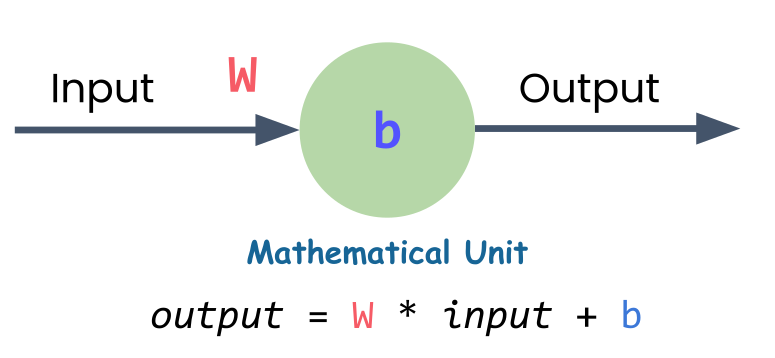

In [5]:
Image('../../assets//single_neuron.png')


#### Building the Model in PyTorch

The `nn.Sequential` is a container that passes data through layers in order, but makes it easy for you to swap components without all of that messy rewiring.

<code>nn.[Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)(nn.[Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)(8, 1))</code> to create a linear model with eight inputs (e.g., temperature, traffic, distance, etc.) and one output (arrival time):

```python
model = nn.Sequential(nn.Linear(8, 1))
```

* `nn.Linear(8, 1)`:
  *  The first `8` means it takes one input (distance, temperature, etc.), 
  *  and the second `1` means one neuron that is producing one output (predicted time).
  * This single linear layer will automatically manage the weight and bias parameters for you.
  * It applies a linear transformation to the input, which is all the linear layer actually does.

PyTorch makes all of this easy—layers like this are built into the framework, and you can create them with just a single line of code.

Step 1. create a model with only one input (distance) and one output (time):

In [ ]:
# INSERT YOUR CODE HERE
model = ...

### Stage 4: Training

Time to train your neural network (this is stage 4 of the ML pipeline: **Training**).

**Stage 4: Training** - Having a good model design is just the blueprint. Next, you actually have to teach it to make those good predictions. Here's where your model starts learning. You'll feed in examples like "the delivery was 8.2 miles and took 22 minutes" or "this one was 12.5 miles and took 31 minutes," and the model will gradually start to figure out the pattern.

In the training stage, you'll learn how to configure the key pieces that make this process work: How do you measure prediction errors? How do you guide the model to improve? And how do you control how fast it learns with training settings?

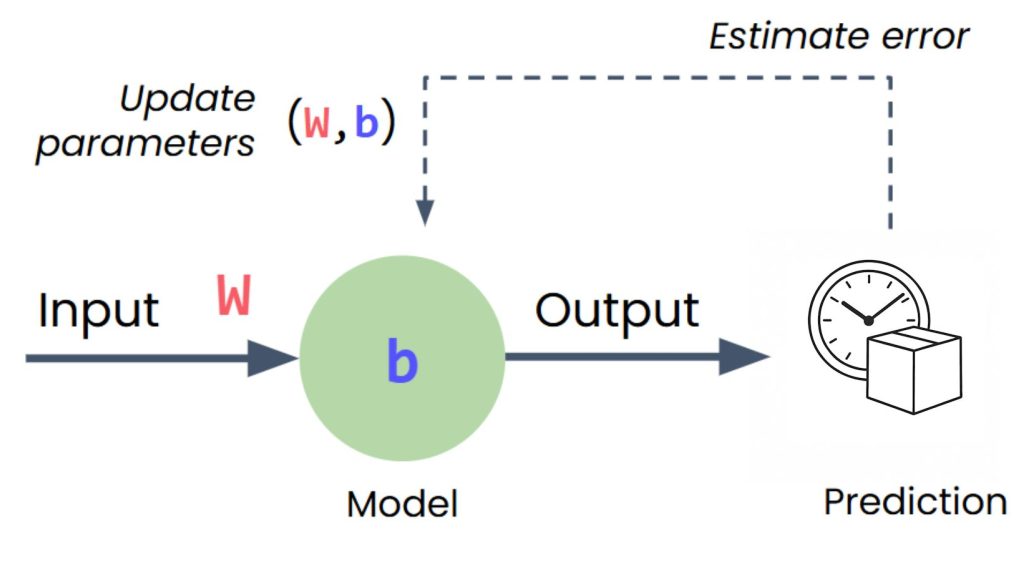

In [6]:
Image('../../assets//training_loop.png')

You need two key tools to help your model learn from the data:

* **Loss Function:** <code>nn.[MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)</code> defines the Mean Squared Error loss function.
    * It measures how wrong your predictions are. If you predict 25 minutes but the actual delivery took 30 minutes, the loss function quantifies that 5-minute error. But if you predict 45 minutes when it actually took 60, that's a bigger error than, say, predicting 58 minutes. The model's goal is to minimize this error.
    * The loss function compares the predictions to the real times and calculates just how wrong they are.

* **Optimizer:** <code>[optim](https://pytorch.org/docs/stable/optim.html).[SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)</code> sets up the Stochastic Gradient Descent optimizer. 
    * SGD is the algorithm that figures out which direction to adjust your weight and bias to reduce that error. Just like when you manually think "I need a steeper slope for predicting delivery times," it's now done with the calculus behind the scenes.
    * `model.parameters()` is how you access those values in PyTorch, which in this case is just the weight and bias from your single neuron.
    * `lr=0.01`: This learning rate controls how big each adjustment step is. Smaller values mean you adjust your weight and bias parameters by smaller amounts. Larger values mean bigger adjustments. Too large and you might overshoot the best values; too small and training takes forever. Both extremes can have their own challenges.

In [4]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Now it's time for your model to learn. The training loop is where your model cycles through the data repeatedly, gradually discovering the relationship between distance and delivery time.

This is the training loop where the actual learning happens. Remember when you might manually adjust the weight and bias to get closer to the right line? This code is doing the same thing automatically hundreds of times. In fact, it will do it for 500 times.

You'll train for `500` epochs (complete passes through your data). Each full pass through the training data is called an **epoch**. In each epoch, the model will:
1. Make predictions
2. Measure how far off those predictions are
3. Adjust its internal parameters to improve on those predictions

Here's what each line is doing:

* <code>optimizer.[zero_grad()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html)</code>: Clears gradients from the previous round. You'll hear much more about this method later in the course, but for now, just know that it clears out all of the calculated values from the previous training round. Without it, PyTorch would accumulate adjustments across rounds, which would mess up all of your learning.

* `outputs = model(distances)`: Performs the "forward pass", where the model makes predictions based on the input `distances`. This tells the model to use the distance as inputs.

* `loss = loss_function(outputs, times)`: Calculates how wrong the predicted `outputs` are by comparing them to the actual delivery `times`. This compares the predictions to the real times and calculates just how wrong they are.

* <code>loss.[backward()](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)</code>: The "backward pass" (backpropagation) is performed, which calculates exactly how to adjust the weight and bias to reduce the error. Just like when you think "I need a steeper slope for predicting delivery times," it's now done with the calculus behind the scenes. The technical term for this process is called **backpropagation**.

* <code>optimizer.[step()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html)</code>: Updates the model's parameters using those calculated adjustments. This will make all of those adjustments.

* The loss is printed every 50 epochs to allow you to track the model's learning progress as the error decreases.

In [ ]:
# Training loop
for epoch in range(500):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    
    # Make predictions (forward pass)
    outputs = model(distances)
    
    # Calculate the loss
    # Remember:
    # outputs: predicted target
    #   times: actual/true target
    loss = loss_function(outputs, times)
    
    # Calculate adjustments (backward pass)
    loss.backward()
    
    # Update the model's parameters (through the optimizer)
    optimizer.step()
    
    # Print loss every 50 epochs (to see the progress)
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.03944866359233856
Epoch 100: Loss = 0.035811737179756165
Epoch 150: Loss = 0.0331188440322876
Epoch 200: Loss = 0.03112369030714035
Epoch 250: Loss = 0.029645616188645363
Epoch 300: Loss = 0.02855011820793152
Epoch 350: Loss = 0.0277385413646698
Epoch 400: Loss = 0.027137158438563347
Epoch 450: Loss = 0.026691725477576256
Epoch 500: Loss = 0.026361485943198204


> You can experience the training loop of a neural network in action using this playground: https://nnplayground.com/

#### Visualizing the Training Results

Let's see what your model learned. By plotting the model's predictions as a line against your actual delivery data points, you can check if it found a good pattern.

The helper function, `plot_results`, will show you:
* Your original data points (actual deliveries)
* The line your model learned (its predictions)
* How well they match

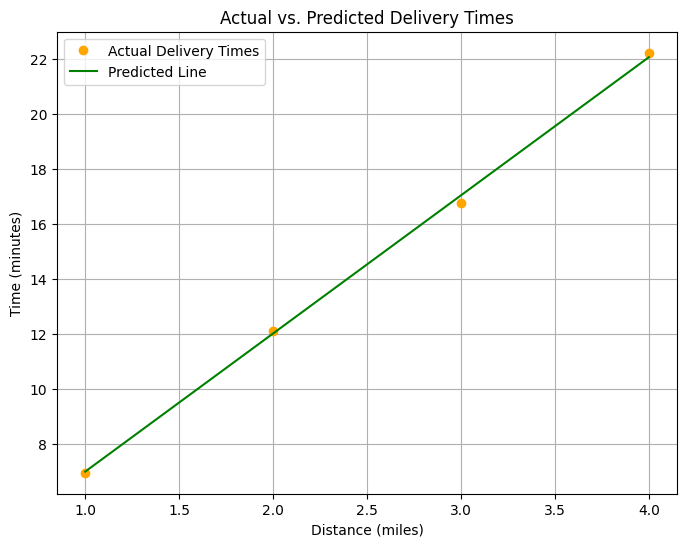

In [6]:
helper_utils.plot_results(model, distances, times)

### Make Your Prediction (Stage 5: Evaluation)

Your model is trained. Now for the moment of truth. **Can you make that 7-mile delivery in under 30 minutes?**

**Stage 5: Evaluation and Debugging** - Even when training finishes successfully, you're not done yet. Now comes the real test. Can your model make a good prediction on new unseen data? This process, using a trained model to make predictions on unseen data, is called **inference**.

To know if you have a really good model, you need to see how well it performs on new data—examples that it wasn't trained on. In a full evaluation, you would use a test set, which is a portion of the delivery data that you held back during training. You'd measure: How often is your model close? How often is it way off? The key question is simple: Does your model work well enough for you to trust it?

While a full evaluation would test the model on many unseen data points, here you'll jump straight to its intended purpose: making a **data-driven prediction** for a specific delivery.

* First, you'll set the `distance_to_predict` variable.
    * It is initially set to `7.0` to solve the original problem.
    * After running the code, you can easily come back and change this single variable to get predictions for any other distance.
* This variable is then used to create the input tensor for the model.

In [7]:
distance_to_predict = 7.0

* The entire prediction process is wrapped in a `with torch.no_grad()` block.
    * The line with `torch.no_grad()` tells PyTorch that you're not training anymore, just doing inference. Training takes extra work under the hood (tracking gradients for backpropagation), but for inference, we can skip all of that and run much more efficiently. This makes the process faster and more efficient.
* A new input tensor is created using the `distance_to_predict` variable.
    * This must be formatted as a 2D tensor (`[[7.0]]`), as the model expects this specific structure, not a simple number. Remember the bracket structure from earlier: the outer brackets represent the batch, and the inner brackets represent the sample.
* Your trained `model` is called with this new tensor to generate a `predicted_time`.
    * If the model learned what it was supposed to, it should give you a good answer.
* After getting the prediction (which is also a tensor), the code extracts the actual numerical value from it using `.item()`.

In [8]:
# Use the torch.no_grad() context manager for efficient predictions
with torch.no_grad():
    # Convert the Python variable into a 2D PyTorch tensor that the model expects
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    
    # Pass the new data to the trained model to get a prediction
    predicted_time = model(new_distance)
    
    # Use .item() to extract the scalar value from the tensor for printing
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

    # Use the scalar value in a conditional statement to make the final decision
    if predicted_time.item() > 30:
        print("\nDecision: Do NOT take the job. You will likely be late.")
    else:
        print("\nDecision: Take the job. You can make it!")

Prediction for a 7.0-mile delivery: 37.1 minutes

Decision: Do NOT take the job. You will likely be late.


<br>

Congratulations! You've successfully trained and used your first neural network in PyTorch to solve a practical problem!

Your model predicted that a `7-mile` delivery would take more than 30 minutes. Based on this prediction, you made the data-driven decision to turn down the job, protecting yourself from being late and putting your job at risk.

## Inspecting the Model's Learning

Now that you have a working model, let's see the exact relationship it learned from the data. You can do this by inspecting the model's internal parameters, the final **weight** and **bias** values it discovered during training. These values define the precise line your model is now using to make predictions.

In [9]:
# Access the first (and only) layer in the sequential model
layer = model[0]

# Get weights and bias
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weight: {weights}")
print(f"Bias: {bias}")

Weight: [[5.015503]]
Bias: [1.9849645]


<br>

**Interpreting the Results**

These learned parameters have real-world meaning in the context of your delivery problem:

* **Weight (~5.0)**: This means that for each additional mile, your model predicts the delivery time will increase by about 5.0 minutes.

* **Bias (~2.0)**: This represents the base time for any delivery, regardless of distance. Think of it as the time needed to pick up the order and get on your bike.

Your model has discovered a linear relationship between distance and time. With the **W** and **B** values it learned, it can now predict delivery times for any distance using the equation:

> <code>Time = 5.0 * Distance + 2.0</code>

## Testing Your Model on More Complex Data

Your company is expanding its delivery services. To handle longer routes more efficiently, **any delivery over 3 miles will now be made by car instead of bike.**

That means your dataset just changed. It now includes a mix of bike and car deliveries, two different kinds of trips. You already have a model that worked well before. **But will it still work now?** Let’s take a closer look.

* Define the new dataset, which includes the original bike data plus new data points for longer-distance car deliveries.
    * `new_distances`: A tensor containing distances from 1 to 20 miles.
    * `new_times`: A tensor with the corresponding delivery times for the combined dataset.

In [10]:
# Combined dataset: bikes for short distances, cars for longer ones
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

Now let's test how well your bike-only model handles this new mixed dataset.

* Use your trained `model` to generates predictions on the `new_distances`.

In [11]:
# Use the already-trained linear model to make predictions
with torch.no_grad():
    predictions = model(new_distances)

* Calculate the `new_loss` between the model's predictions and the actual times.
* Notice how the printed loss value will be *significantly* higher than the loss at the end of training. This will indicate a poor fit.

In [12]:
# Calculate the new loss
new_loss = loss_function(predictions, new_times)
print(f"Loss on new, combined data: {new_loss.item():.2f}")

Loss on new, combined data: 179.26


<br>

To understand why the loss is so high, let's visualize what's happening. This plot reveals why your linear model struggles with the new data.

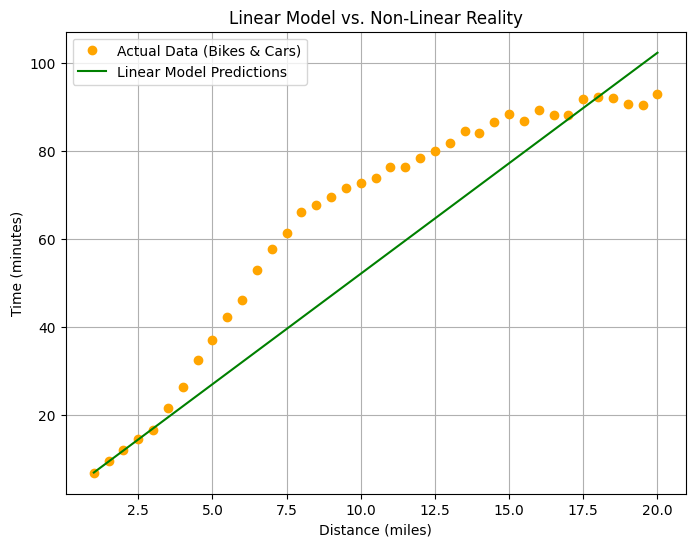

In [13]:
helper_utils.plot_nonlinear_comparison(model, new_distances, new_times)

<br>

**Why do you think your linear model failed?**

Your model performed well on bike only data, where the relationship between distance and time was fairly consistent. But with the new dataset, things changed.

The loss is much higher and a quick look at the visualization showed why:

* **Actual Data (orange points)**: Delivery times follow a more complex pattern. Bikes take short, direct routes. Cars deal with city traffic, then speed up on highways. The relationship between distance and time isn't smooth or consistent, it bends and shifts.
  
* **Model Predictions (green line)**: Your model can only draw a straight line. It learned one pattern: each mile adds about the same amount of time. But now that assumption no longer holds.

To capture these non-linear patterns, you need to give your model the ability to learn curves, not just lines. In the next lesson, you'll discover **activation functions**, a technique that transforms neural networks from fitting straight lines to fitting complex, real-world patterns. Activation functions allow neurons to learn non-linear relationships, enabling your models to handle the bends and shifts in real-world data.

## Conclusion

Congratulations! You've successfully built and trained your first PyTorch model to solve the initial delivery problem. You saw how a **linear model** could learn the relationship in simple bike-only data to make a correct, data-driven decision. However, the true lesson came when this model failed on a more complex dataset containing both bikes and cars. This revealed a key concept: a simple linear model, no matter how well-trained, can only learn straight-line patterns and struggles when reality becomes **non-linear**.

This challenge perfectly sets the stage for your next lesson, where you will learn how to give your models the ability to learn curves, not just lines. By working through the essential stages of the **Machine Learning Pipeline** in this lab, you have built a solid foundation. Understanding where and why this simple model fails is the crucial first step toward building more advanced networks capable of solving truly complex problems.